## Load Dataset

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('loan.csv')
df.head() # View the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [3]:
# We deal with NULL rows to finish task1
df.drop("Loan_ID", axis=1, inplace=True)
# checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# We choose to drop the NULL rows
new_df = df.dropna()

## Encode

In [5]:
# We use label encoding
new_df.Gender = new_df.Gender.map({'Male':1,'Female':0})
new_df.Married = new_df.Married.map({'Yes':1,'No':0})
new_df.Dependents = new_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
new_df.Education = new_df.Education.map({'Graduate':1,'Not Graduate':0})
new_df.Self_Employed = new_df.Self_Employed.map({'Yes':1,'No':0})
new_df.Property_Area = new_df.Property_Area.map({'Urban':0,'Semiurban':1,'Rural':2})
new_df.Loan_Status = new_df.Loan_Status.map({'Y':1,'N':0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_12640\3317557441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.Gender = new_df.Gender.map({'Male':1,'Female':0})
C:\Users\DELL\AppData\Local\Temp\ipykernel_12640\3317557441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.Married = new_df.Married.map({'Yes':1,'No':0})
C:\Users\DELL\AppData\Local\Temp\ipykernel_12640\3317557441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

## Data process

In [6]:
# Split the dataset by the bootstraping method, since the number
# of the whole dataset is so small
train_set = new_df.sample(n = new_df.shape[0],replace = True,axis = 0)
temp = train_set.drop_duplicates()
test_set = pd.concat([new_df,temp,temp]).drop_duplicates(keep = False)

In [7]:
# Split X and y
X_train = train_set.iloc[:,0:11]
y_train = train_set['Loan_Status']
X_test = test_set.iloc[:,0:11]
y_test = test_set['Loan_Status']
# Normalization(Min-Max mothod)
X_train_norm = (X_train-X_train.min())/(X_train.max()-X_train.min())
y_train_norm = (y_train-y_train.min())/(y_train.max()-y_train.min())
X_test_norm = (X_test-X_test.min())/(X_test.max()-X_test.min())
y_test_norm = (y_test-y_test.min())/(y_test.max()-y_test.min())

## Train

In [8]:
from Logistic import LogisticRegression
model = LogisticRegression()
# The train with no regularzation, the learning rate is 0.01
cost_list,params,grads = model.Gradient_descent_train(X_train_norm,y_train_norm,0.01,10000,0,1)

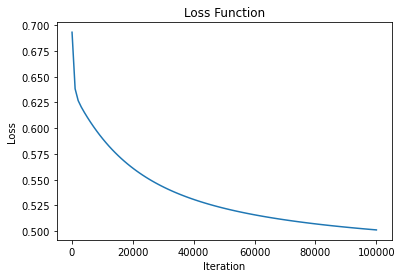

In [10]:
# Plot the loss curve of training above
import matplotlib.pyplot as plt
epoch = np.linspace(100,100000,100)
plt.plot(epoch,cost_list)
plt.title('Loss Function')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Test and evaluation

In [11]:
y_train_predict = model.predict_test(X_train_norm,params)
y_test_predict = model.predict_test(X_test_norm,params)

In [12]:
# calculate the accuracy to evaluate the model
accuracy_score_train = model.accuracy_metric(y_train_norm,y_train_predict)
accuracy_score_test = model.accuracy_metric(y_test_norm,y_test_predict)
print('train accuracy is: ',accuracy_score_train)
print('test accuracy is: ',accuracy_score_test)

train accuracy is:  0.78125
test accuracy is:  0.861271676300578


## Adjust the parameters

In [ ]:
# l1 regularization with the parameters lamada = 1
cost_list,params,grads = model.Gradient_descent_train(X_train_norm,y_train_norm,0.01,100000,1,1)
y_train_predict = model.predict_test(X_train_norm,params)
y_test_predict = model.predict_test(X_test_norm,params)
accuracy_score_train = model.accuracy_metric(y_train_norm,y_train_predict)
accuracy_score_test = model.accuracy_metric(y_test_norm,y_test_predict)
print('train accuracy with l1 regularizationis: ',accuracy_score_train)
print('test accuracy with l1 regularization is: ',accuracy_score_test)

In [ ]:
# l2 regularization with the parameters lamada = 1
cost_list,params,grads = model.Gradient_descent_train(X_train_norm,y_train_norm,0.01,10000,2,2)
y_train_predict = model.predict_test(X_train_norm,params)
y_test_predict = model.predict_test(X_test_norm,params)
accuracy_score_train = model.accuracy_metric(y_train_norm,y_train_predict)
accuracy_score_test = model.accuracy_metric(y_test_norm,y_test_predict)
print('train accuracy with l2 regularization is: ',accuracy_score_train)
print('test accuracy with l2 regularization is: ',accuracy_score_test)

In [ ]:
# adjusting the learning rate with no regularization
learning_rate = 0.05
cost_list,params,grads = model.Gradient_descent_train(X_train_norm,y_train_norm,learning_rate,10000,0,0)
y_train_predict = model.predict_test(X_train_norm,params)
y_test_predict = model.predict_test(X_test_norm,params)
accuracy_score_train = model.accuracy_metric(y_train_norm,y_train_predict)
accuracy_score_test = model.accuracy_metric(y_test_norm,y_test_predict)
print('train accuracy is: ',accuracy_score_train)
print('test accuracy is: ',accuracy_score_test)

## Optimizing Model Evaluation Methods: 5 times Bootstrapping and get the mean of accuracy


In [9]:
# initialize
accuracy_train = []
accuracy_test = []

for i in range(5):
    train_set = new_df.sample(n = new_df.shape[0],replace = True,axis = 0)
    temp = train_set.drop_duplicates()
    test_set = pd.concat([new_df,temp,temp]).drop_duplicates(keep = False)
    # Split X and y
    X_train = train_set.iloc[:,0:11]
    y_train = train_set['Loan_Status']
    X_test = test_set.iloc[:,0:11]
    y_test = test_set['Loan_Status']
    # Normalization(Min-Max mothod)
    X_train_norm = (X_train-X_train.min())/(X_train.max()-X_train.min())
    y_train_norm = (y_train-y_train.min())/(y_train.max()-y_train.min())
    X_test_norm = (X_test-X_test.min())/(X_test.max()-X_test.min())
    y_test_norm = (y_test-y_test.min())/(y_test.max()-y_test.min())

    from Logistic import LogisticRegression
    model = LogisticRegression()

    # We can adjust the parameters here
    # Train
    cost_list,params,grads = model.Gradient_descent_train(X_train_norm,y_train_norm,0.01,10000,2,1)
    
    # Test
    y_train_predict = model.predict_test(X_train_norm,params)
    y_test_predict = model.predict_test(X_test_norm,params)
    # Accuracy
    accuracy_train.append(model.accuracy_metric(y_train_norm,y_train_predict))
    accuracy_test.append(model.accuracy_metric(y_test_norm,y_test_predict))

acc_train = sum(accuracy_train)/len(accuracy_train)
acc_test = sum(accuracy_test)/len(accuracy_test)

print('train accuracy is: ',acc_train)
print('test accuracy is: ',acc_test)

train accuracy is:  0.6766666666666666
test accuracy is:  0.7026081888509284
